In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
!unzip '/content/test_HujdGe7.zip'
!unzip '/content/train_oSwQCTC.zip'

Archive:  /content/test_HujdGe7.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/train_oSwQCTC.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train = pd.read_csv('/content/train_oSwQCTC.zip')
test = pd.read_csv('/content/test_HujdGe7.zip')

In [ ]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,672,0,0,10,0,2,0,3,NaN,NaN,8370
1,1000001,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,852,0,0,10,0,2,0,12,NaN,NaN,1422
3,1000001,828,0,0,10,0,2,0,12,14.0,NaN,1057
4,1000002,2734,1,6,16,2,4,0,8,NaN,NaN,7969


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int64  
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 50.4 MB


In [ ]:
train.shape

(550068, 12)

In [ ]:
train['Age'].value_counts()

Age
2    219587
3    110013
1     99660
4     45701
5     38501
6     21504
0     15102
Name: count, dtype: int64

In [ ]:
import pandas as pd

# Sample data
data = {
    'age': ['0-17', '18-25', '26-35', '36-45', '55+', '46-50']
}

# Load data into a DataFrame
df = pd.DataFrame(data)

# Convert age ranges to numerical values
def age_to_numeric(age_range):
    if age_range == '55+':
        return 55
    elif age_range == '0-17':
        return 8.5  # Average of 0 and 17
    elif age_range == '18-25':
        return 21.5  # Average of 18 and 25
    elif age_range == '26-35':
        return 30.5  # Average of 26 and 35
    elif age_range == '36-45':
        return 40.5  # Average of 36 and 45
    elif age_range == '46-50':
        return 48  # Average of 46 and 50
    elif age_range == '51-55':
        return 53  # Average of 51 and 55
    else:
        return None

train['age_numeric'] = train['Age'].apply(age_to_numeric)

# Display the DataFrame
train.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,age_numeric
0,1000001,672,0,0,10,0,2,0,3,NaN,NaN,8370,None
1,1000001,2376,0,0,10,0,2,0,1,6.0,14.0,15200,None
2,1000001,852,0,0,10,0,2,0,12,NaN,NaN,1422,None
3,1000001,828,0,0,10,0,2,0,12,14.0,NaN,1057,None
4,1000002,2734,1,6,16,2,4,0,8,NaN,NaN,7969,None


In [ ]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
age_numeric                   550068
dtype: int64

In [ ]:
def replace_null_values(df):
  for i in df.columns:
    if df[i].dtype =='int' or df[i].dtype=='float':
      median = df[i].median()
      df[i].fillna(median,inplace=True)
  return df

In [ ]:
replace_null_values(train)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,age_numeric
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,14.0,8370,8.5
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,8.5
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,14.0,1422,8.5
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,14.0,1057,8.5
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,14.0,7969,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,9.0,14.0,368,53.0
550064,1006035,P00375436,F,26-35,1,C,3,0,20,9.0,14.0,371,30.5
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,9.0,14.0,137,30.5
550066,1006038,P00375436,F,55+,1,C,2,0,20,9.0,14.0,365,55.0


In [ ]:
train.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
age_numeric                   False
dtype: bool

In [ ]:
train.groupby('User_ID')['Purchase'].sum()

User_ID
1000001     334093
1000002     810472
1000003     341635
1000004     206468
1000005     821001
            ...   
1006036    4116058
1006037    1119538
1006038      90034
1006039     590319
1006040    1653299
Name: Purchase, Length: 5891, dtype: int64

In [ ]:
train.groupby('Product_ID')['Purchase'].sum()

Product_ID
P00000142    12837476
P00000242     3967496
P00000342     1296475
P00000442      441173
P00000542      807212
               ...   
P0099442      2870383
P0099642        83710
P0099742       991948
P0099842       737312
P0099942        78019
Name: Purchase, Length: 3631, dtype: int64

In [ ]:
train.drop('Age',axis=1,inplace=True)

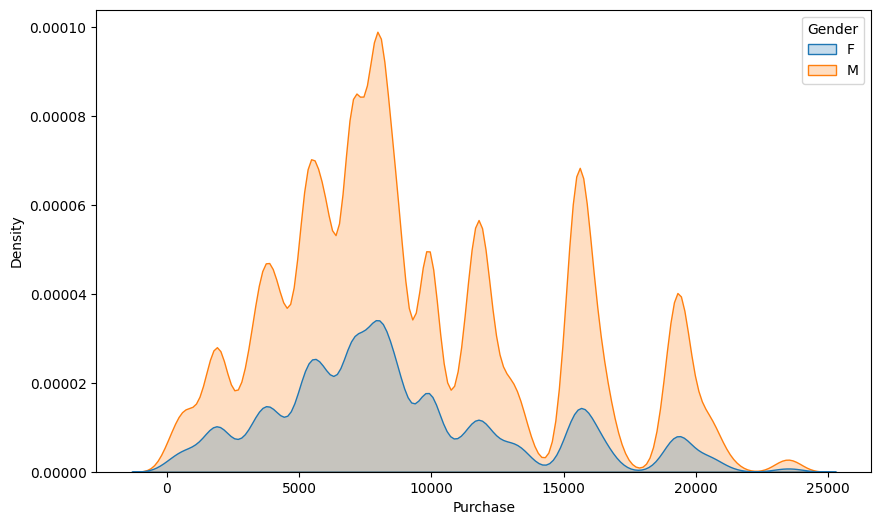

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(x=train['Purchase'],hue=train['Gender'],fill=True)
plt.show()

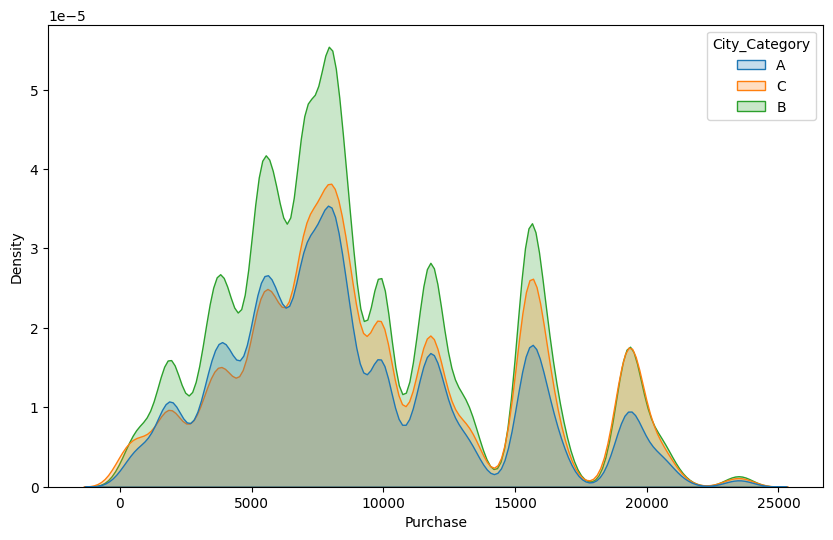

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(x=train['Purchase'],hue=train['City_Category'],fill=True)
plt.show()

<ipython-input-66-c6bd70d90ee1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i])


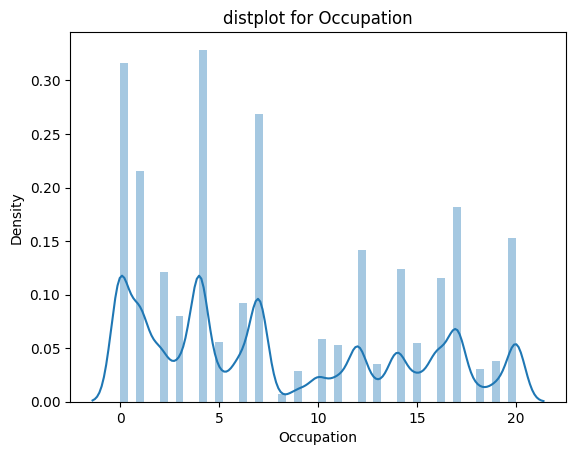

<ipython-input-66-c6bd70d90ee1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i])


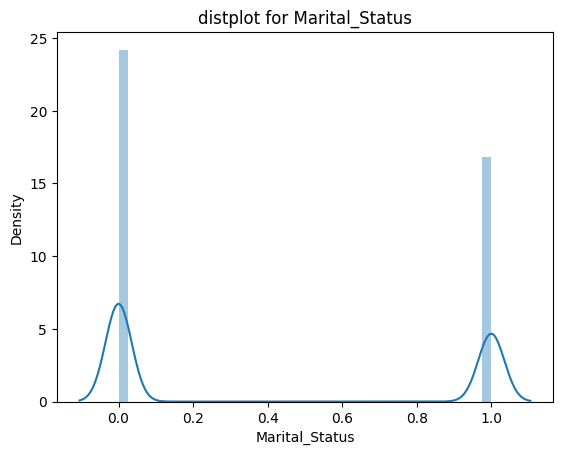

<ipython-input-66-c6bd70d90ee1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i])


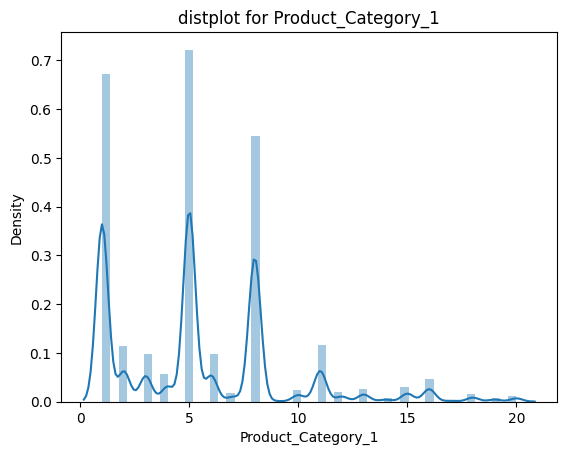

<ipython-input-66-c6bd70d90ee1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i])


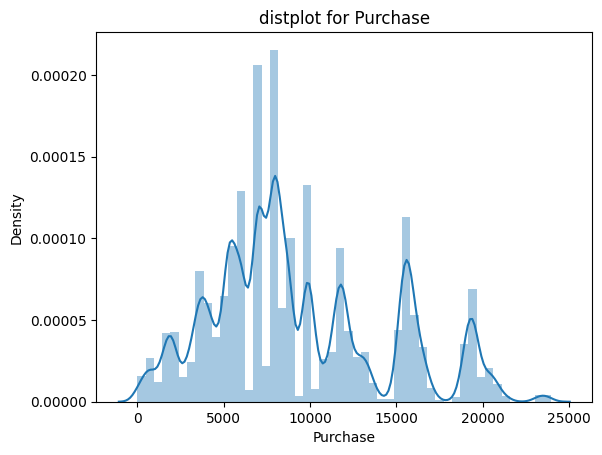

In [ ]:
for i in train.columns:
  if train[i].dtype =='int':
    if i!='User_ID':
      sns.distplot(train[i])
      plt.title(f"distplot for {i}")
      plt.show()

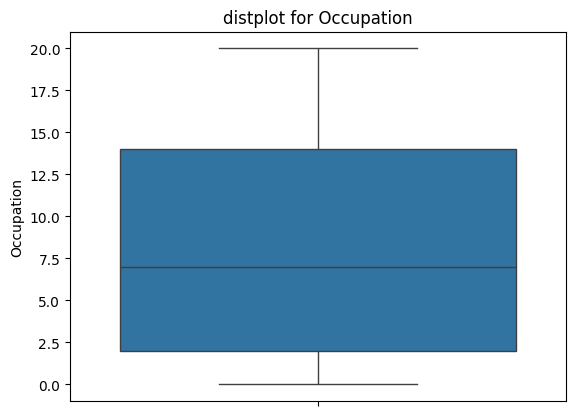

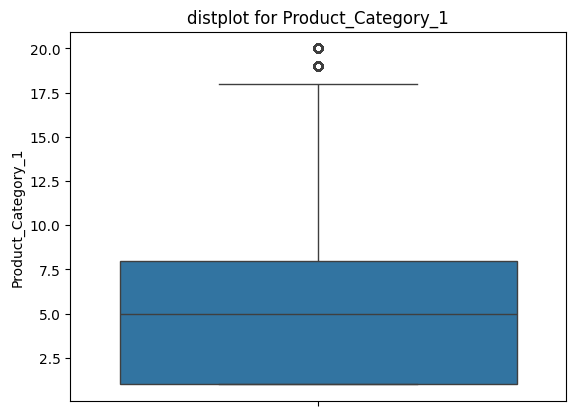

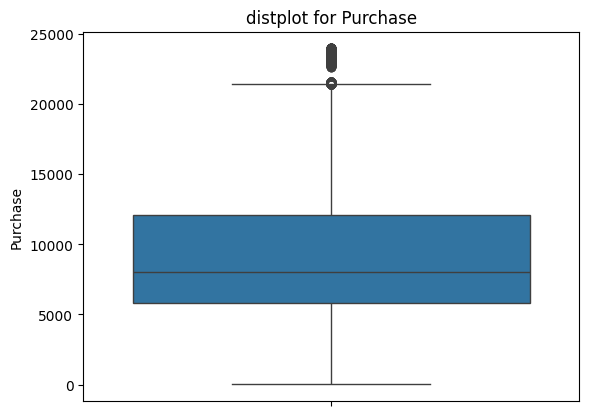

In [ ]:
for i in train.columns:
  if train[i].dtype =='int':
    if i not in ['User_ID','Marital_Status']:
      sns.boxplot(train[i])
      plt.title(f"distplot for {i}")
      plt.show()

In [ ]:
train['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

In [ ]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].replace('4+','5')
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].astype('float')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int64  
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  float64
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
 12  age_numeric                 0 non-null       object 
dtypes: float64(3),

In [ ]:
train['Product_ID'].value_counts()

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64

In [ ]:
train['Product_ID_encoded'] = train['Product_ID'].astype('category').cat.codes



In [ ]:
for i in train.columns:
  if train[i].dtype =='object':
    le = LabelEncoder()
    train[i] = le.fit_transform(train[i])

In [ ]:
x = train.drop('Purchase',axis=1)
y = train['Purchase']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(440054, 12)
(110014, 12)
(440054,)
(110014,)


In [ ]:
x_train

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,age_numeric,Product_ID_encoded
178247,1003576,2228,1,7,1,3.0,1,1,15.0,NaN,0,2228
196647,1000342,1305,1,12,2,4.0,0,5,NaN,NaN,0,1305
418590,1004386,2782,1,5,1,1.0,0,8,14.0,17.0,0,2782
408727,1002931,2631,1,4,1,2.0,0,8,NaN,NaN,0,2631
216416,1003434,485,1,4,1,1.0,0,1,8.0,NaN,0,485
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,1004993,398,1,17,2,2.0,0,5,NaN,NaN,0,398
259178,1003921,220,1,14,2,2.0,1,5,NaN,NaN,0,220
365838,1002252,3056,0,1,1,1.0,0,5,NaN,NaN,0,3056
131932,1002257,16,0,4,1,2.0,0,8,14.0,NaN,0,16


In [ ]:
x_train

,User_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,age_numeric,Product_ID_encoded
178247,1003576,1,7,1,3.0,1,1,15.0,14.0,53.0,2228
196647,1000342,1,12,2,5.0,0,5,9.0,14.0,21.5,1305
418590,1004386,1,5,1,1.0,0,8,14.0,17.0,30.5,2782
408727,1002931,1,4,1,2.0,0,8,9.0,14.0,21.5,2631
216416,1003434,1,4,1,1.0,0,1,8.0,14.0,21.5,485
...,...,...,...,...,...,...,...,...,...,...,...
110268,1004993,1,17,2,2.0,0,5,9.0,14.0,48.0,398
259178,1003921,1,14,2,2.0,1,5,9.0,14.0,30.5,220
365838,1002252,0,1,1,1.0,0,5,9.0,14.0,21.5,3056
131932,1002257,0,4,1,2.0,0,8,14.0,14.0,21.5,16


In [ ]:
std = MinMaxScaler()
X_train = std.fit_transform(x_train)
X_test = std.fit_transform(x_test)

In [ ]:
X_train

array([[0.59198543, 1.        , 0.35      , ..., 0.73333333, 0.95698925,
        0.6137741 ],
       [0.0564663 , 1.        , 0.6       , ..., 0.73333333, 0.27956989,
        0.35950413],
       [0.72611359, 1.        , 0.25      , ..., 0.93333333, 0.47311828,
        0.76639118],
       ...,
       [0.37274383, 0.        , 0.05      , ..., 0.73333333, 0.27956989,
        0.84187328],
       [0.37357178, 0.        , 0.2       , ..., 0.73333333, 0.27956989,
        0.00440771],
       [0.14141414, 0.        , 0.1       , ..., 0.73333333, 0.27956989,
        0.20358127]])

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

In [ ]:
def model_eval(actual,pred):
  mse = mean_squared_error(actual,pred)
  mae = mean_absolute_error(actual,pred)
  rmse = np.sqrt(mse)
  r_score = r2_score(actual,pred)
  print("mean squared error of the model is:",mse)
  print("mean absolute error of the model is:",mae)
  print("root mean squared error of the model is:",rmse)
  print("r2 score  of the model is:",r_score)

In [ ]:
model_eval(y_test,lr_test_pred)

mean squared error of the model is: 21762898.59467975
mean absolute error of the model is: 3573.2748208340986
root mean squared error of the model is: 4665.072196084403
r2 score  of the model is: 0.13385565802739696


In [ ]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
dtree_train_pred = dtree.predict(X_train)
dtree_test_pred = dtree.predict(X_test)

In [ ]:
model_eval(y_test,dtree_test_pred)

mean squared error of the model is: 14306758.314132746
mean absolute error of the model is: 2648.014189103205
root mean squared error of the model is: 3782.4275689208835
r2 score  of the model is: 0.4306035240735392


In [ ]:
rfc = RandomForestRegressor()
rfc.fit(X_train,y_train)


RandomForestRegressor()

In [ ]:
rfc_train_pred = rfc.predict(X_train)
rfc_test_pred = rfc.predict(X_test)

In [ ]:
model_eval(y_test,rfc_test_pred)

mean squared error of the model is: 7593230.914896867
mean absolute error of the model is: 2024.2753344119837
root mean squared error of the model is: 2755.5817743077173
r2 score  of the model is: 0.697796046532277


In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_train_pred = xgb.predict(X_train)
xgb_test_pred = xgb.predict(X_test)

In [ ]:
model_eval(y_test,xgb_test_pred)

mean squared error of the model is: 7080766.777206458
mean absolute error of the model is: 1986.0566556373903
root mean squared error of the model is: 2660.971021489422
r2 score  of the model is: 0.7181916712875624


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [ ]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
test['age_numeric'] = test['Age'].apply(age_to_numeric)

In [ ]:
test.drop('Age',axis=1,inplace=True)

In [ ]:
replace_null_values(test)

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,age_numeric
0,1000004,P00128942,M,7,B,2,1,1,11.0,14.0,48.0
1,1000009,P00113442,M,17,C,0,0,3,5.0,14.0,30.5
2,1000010,P00288442,F,1,B,4+,1,5,14.0,14.0,40.5
3,1000010,P00145342,F,1,B,4+,1,4,9.0,14.0,40.5
4,1000011,P00053842,F,1,C,1,0,4,5.0,12.0,30.5
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,15,B,4+,1,8,9.0,14.0,30.5
233595,1006036,P00254642,F,15,B,4+,1,5,8.0,14.0,30.5
233596,1006036,P00031842,F,15,B,4+,1,1,5.0,12.0,30.5
233597,1006037,P00124742,F,1,C,4+,0,10,16.0,14.0,48.0


In [ ]:
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].replace('4+','5')
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].astype('float')

In [ ]:
test['Product_ID_encoded'] = test['Product_ID'].astype('category').cat.codes


In [ ]:
for i in test.columns:
  if test[i].dtype =='object':
    le = LabelEncoder()
    test[i] = le.fit_transform(test[i])

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  int64  
 2   Gender                      233599 non-null  int64  
 3   Occupation                  233599 non-null  int64  
 4   City_Category               233599 non-null  int64  
 5   Stay_In_Current_City_Years  233599 non-null  float64
 6   Marital_Status              233599 non-null  int64  
 7   Product_Category_1          233599 non-null  int64  
 8   Product_Category_2          233599 non-null  float64
 9   Product_Category_3          233599 non-null  float64
 10  age_numeric                 233599 non-null  float64
 11  Product_ID_encoded          233599 non-null  int16  
dtypes: float64(4), int16(1), int64(7)
memory usage: 20.1 MB


In [ ]:
xgb1 = XGBRegressor()
xgb1.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
test

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,age_numeric,Product_ID_encoded,Purchase
0,1000004,1144,1,7,1,2.0,1,1,11.0,14.0,48.0,1144,1768.854004
1,1000009,994,1,17,2,0.0,0,3,5.0,14.0,30.5,994,99.439453
2,1000010,2672,0,1,1,5.0,1,5,14.0,14.0,40.5,2672,1743.612427
3,1000010,1299,0,1,1,5.0,1,4,9.0,14.0,40.5,1299,1743.612427
4,1000011,519,0,1,2,1.0,0,4,5.0,12.0,30.5,519,-707.961243
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,1049,0,15,1,5.0,1,8,9.0,14.0,30.5,1049,1743.612427
233595,1006036,2345,0,15,1,5.0,1,5,8.0,14.0,30.5,2345,1743.612427
233596,1006036,303,0,15,1,5.0,1,1,5.0,12.0,30.5,303,1743.612427
233597,1006037,1105,0,1,2,5.0,0,10,16.0,14.0,48.0,1105,-707.961243


In [ ]:
test['Purchase'] = xgb1.predict(test)

In [ ]:
sample = pd.read_csv('/content/sample_submission_V9Inaty.csv')

In [ ]:
sample['Purchase'] = test['Purchase']

In [ ]:
train[['Purchase','Product_ID']]

,Purchase,Product_ID
0,8370,672
1,15200,2376
2,1422,852
3,1057,828
4,7969,2734
...,...,...
550063,368,3567
550064,371,3568
550065,137,3568
550066,365,3568


In [ ]:
sample.head()

,Purchase,User_ID,Product_ID
0,1768.854004,1000004,P00128942
1,99.439453,1000009,P00113442
2,1743.612427,1000010,P00288442
3,1743.612427,1000010,P00145342
4,-707.961243,1000011,P00053842


In [ ]:
sample.to_csv('final_samplesubmission.csv',index=False)